In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')

In [3]:
client_train = pd.read_csv('data/client_train.csv', low_memory=False)
invoice_train = pd.read_csv('data/invoice_train.csv', low_memory=False)

client_test = pd.read_csv('data/client_test.csv', low_memory=False)
invoice_test = pd.read_csv('data/invoice_test.csv', low_memory=False)

In [4]:
tuple(client_train.client_id.unique()) == tuple(invoice_train.client_id.unique())


True

In [5]:
len(invoice_train.client_id)

4476749

In [6]:
len(client_train.client_id)

135493

In [7]:
df_train = pd.merge(client_train, invoice_train, how='left', on='client_id')

In [8]:
len(df_train.client_id)

4476749

In [9]:
fraudulent = df_train[df_train['target'] == 1]

In [10]:
fraudulent

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1384,63,train_Client_100032,11,308,07/11/2012,1.0,2017-02-24,11,393848,0,...,9,1,781,0,0,0,3844,4625,8,ELEC
1385,63,train_Client_100032,11,308,07/11/2012,1.0,2016-06-21,11,393848,0,...,9,1,382,0,0,0,3462,3844,4,ELEC
1386,63,train_Client_100032,11,308,07/11/2012,1.0,2018-10-26,11,393848,0,...,9,1,373,0,0,0,6032,6405,4,ELEC
1387,63,train_Client_100032,11,308,07/11/2012,1.0,2018-06-21,11,393848,0,...,9,1,328,0,0,0,5704,6032,4,ELEC
1388,63,train_Client_100032,11,308,07/11/2012,1.0,2018-02-23,11,393848,0,...,9,1,703,0,0,0,5001,5704,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476230,63,train_Client_99982,11,379,21/11/1995,1.0,2010-11-22,10,1379797,0,...,8,1,200,192,0,0,17559,17951,4,ELEC
4476231,63,train_Client_99982,11,379,21/11/1995,1.0,2011-07-19,10,1379797,0,...,6,1,200,98,0,0,18271,18569,4,ELEC
4476232,63,train_Client_99982,11,379,21/11/1995,1.0,2012-03-19,10,1379797,0,...,8,1,187,0,0,0,18933,19120,4,ELEC
4476233,63,train_Client_99982,11,379,21/11/1995,1.0,2013-03-21,10,1379797,0,...,8,1,95,0,0,0,19582,19677,4,ELEC


In [11]:
check = df_train[df_train['client_id']=='train_Client_1000']
check.invoice_date.sort_values()

110    2015-02-13
117    2015-08-06
123    2015-08-10
119    2016-06-06
118    2016-12-02
120    2016-12-10
112    2017-06-06
111    2017-09-02
113    2017-11-10
115    2018-04-06
114    2018-09-02
116    2018-11-10
121    2019-02-13
122    2019-06-17
Name: invoice_date, dtype: object

In [12]:
check2 = df_train[df_train['counter_type'] == 'ELEC' or df_train['counter_type'] == 'GAZ']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_train.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [18]:
import seaborn as sns

In [1]:
def aggregate_by_client_id(invoice_data):
    aggs = {}
    aggs['consommation_level_1'] = ['mean']
    aggs['consommation_level_2'] = ['mean']
    aggs['consommation_level_3'] = ['mean']
    aggs['consommation_level_4'] = ['mean']

    agg_trans = invoice_data.groupby(['client_id']).agg(aggs)
    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (invoice_data.groupby('client_id')
            .size()
            .reset_index(name='{}transactions_count'.format('1')))
    return pd.merge(df, agg_trans, on='client_id', how='left')

In [23]:
aggs = {}
aggs['consommation_level_1'] = ['mean']
aggs['consommation_level_2'] = ['mean']
aggs['consommation_level_3'] = ['mean']
aggs['consommation_level_4'] = ['mean']

agg_trans = invoice_train.groupby(['client_id']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)


In [24]:
df = (invoice_train.groupby('client_id')
        .size()
        .reset_index(name='{}transactions_count'.format('1')))
#return pd.merge(df, agg_trans, on='client_id', how='left')

In [16]:
#group invoice data by client_id
agg_train = aggregate_by_client_id(invoice_train)

In [ ]:
#merge aggregate data with client dataset
train = pd.merge(client_train,agg_train, on='client_id', how='left')

In [ ]:
train_reduced = 

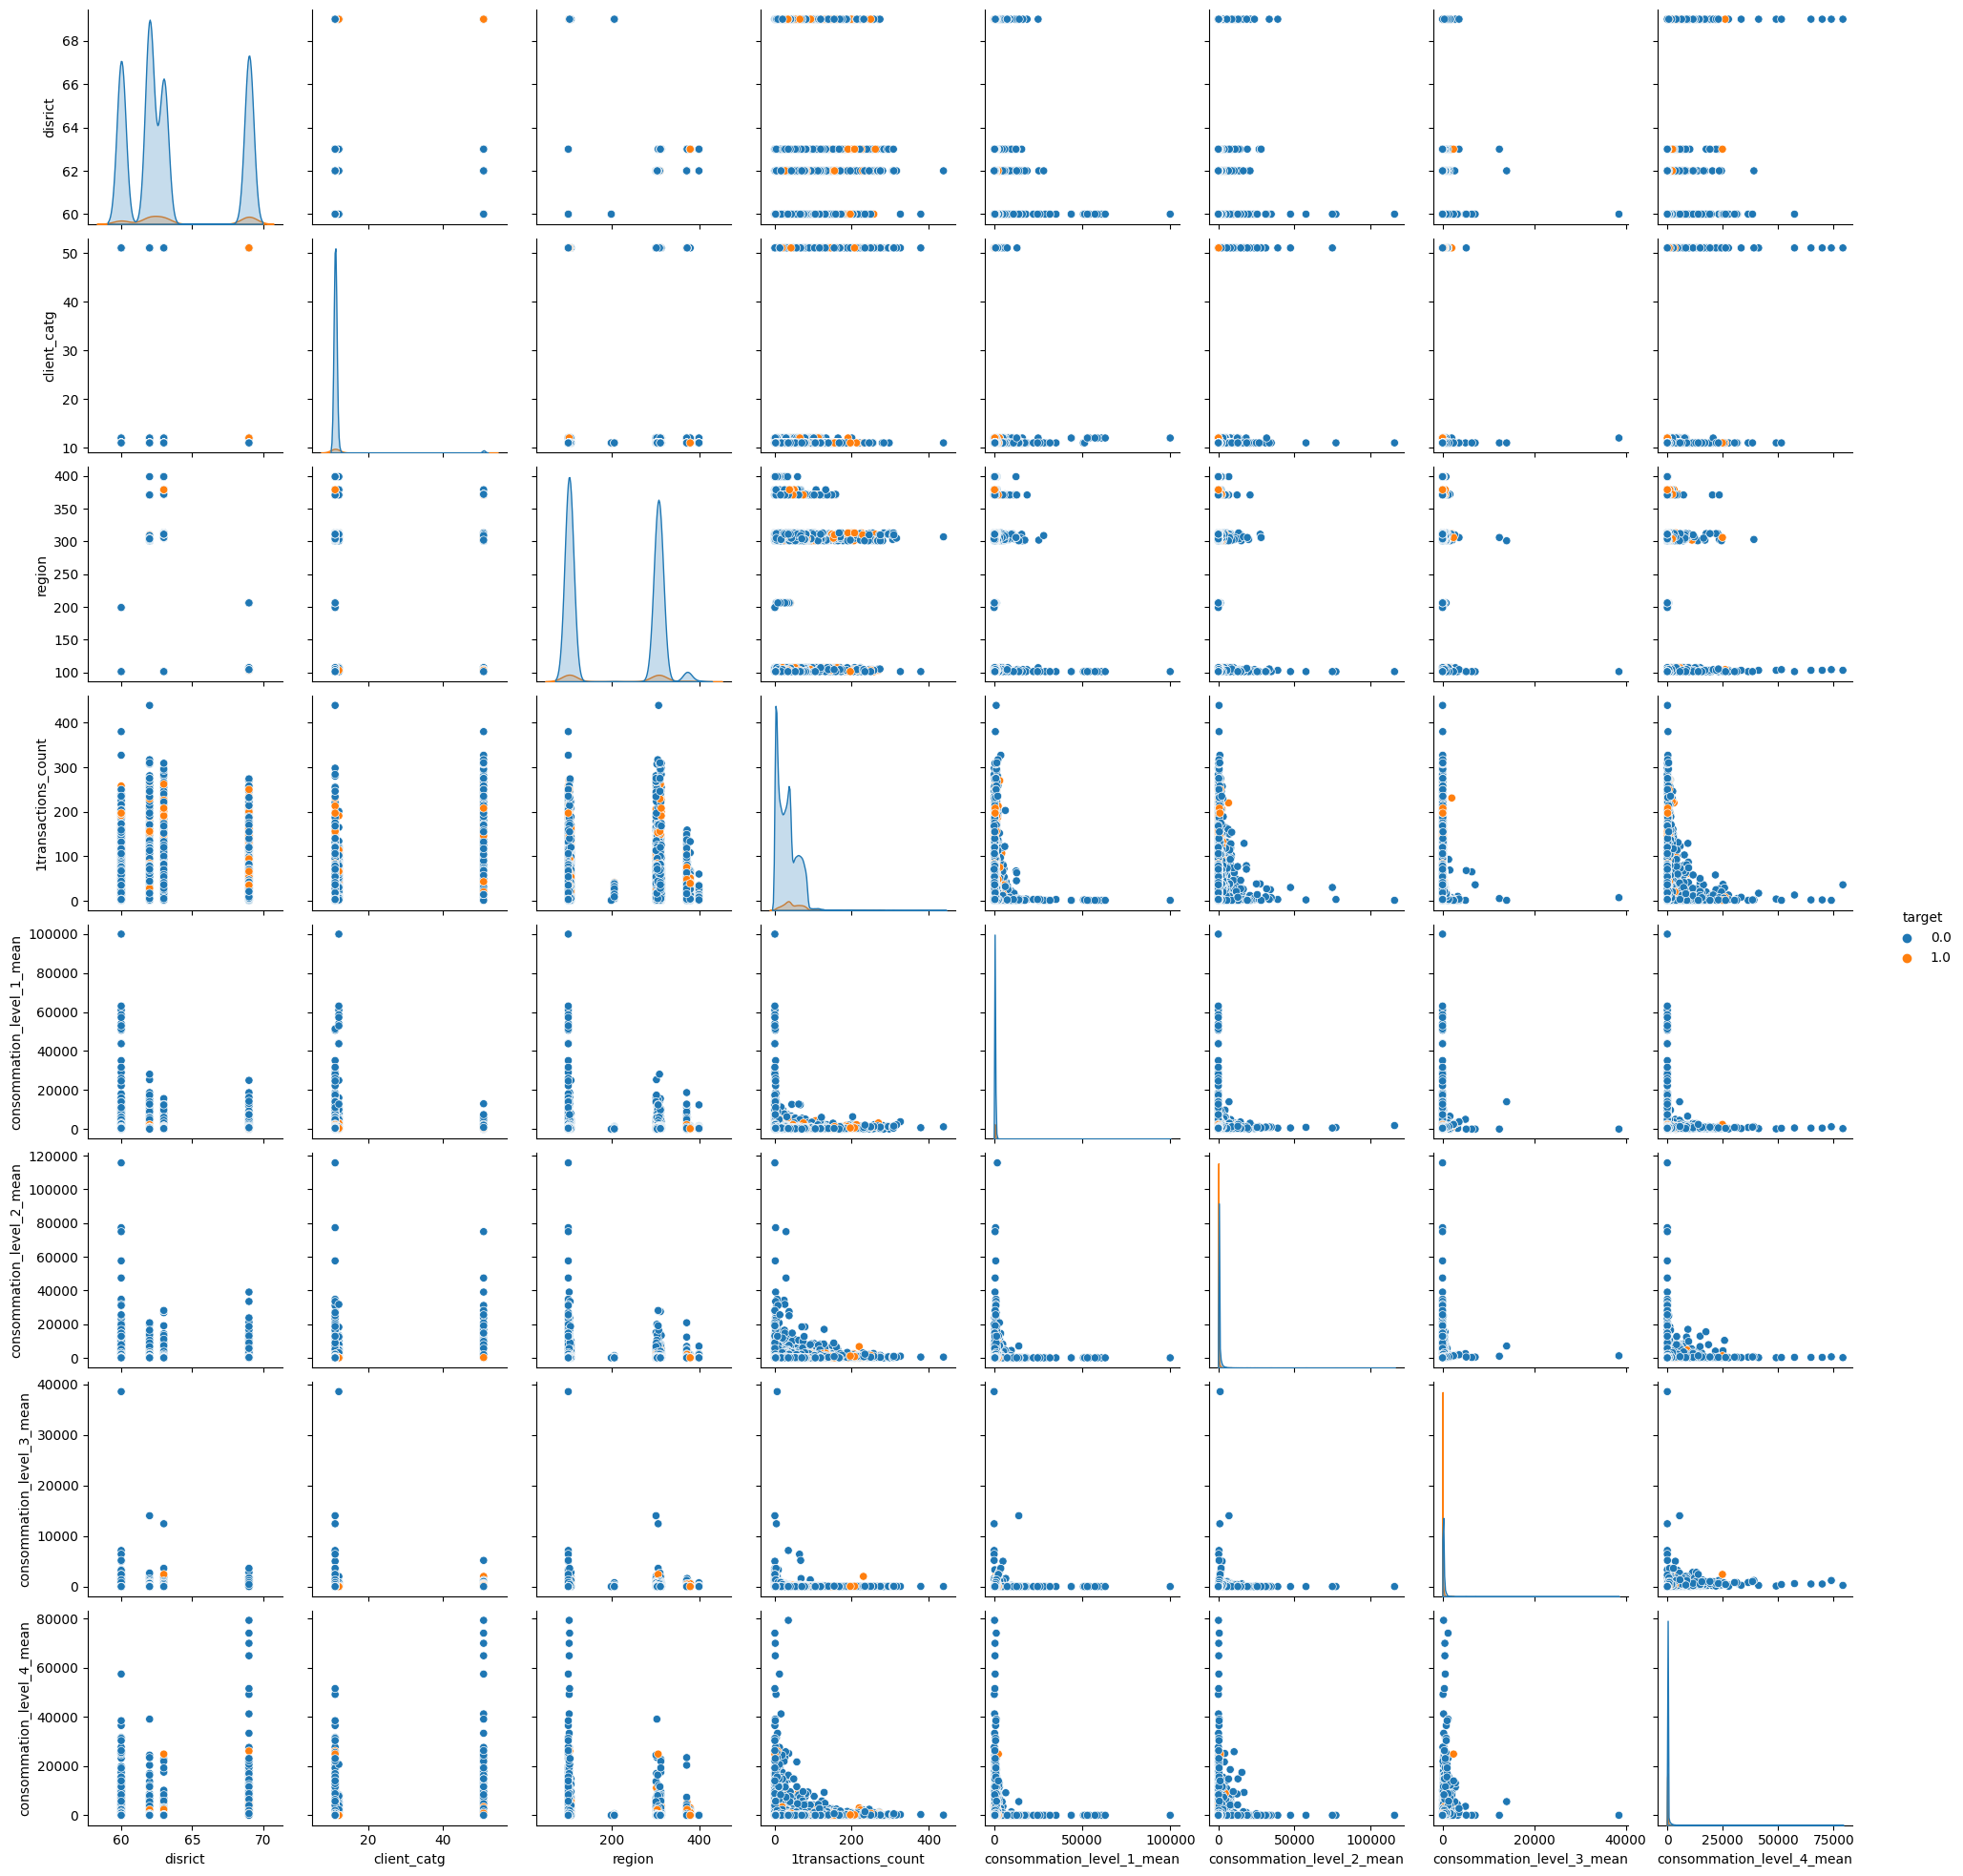

In [21]:
sns.pairplot(train, hue='target')

<Axes: ylabel='months_number'>

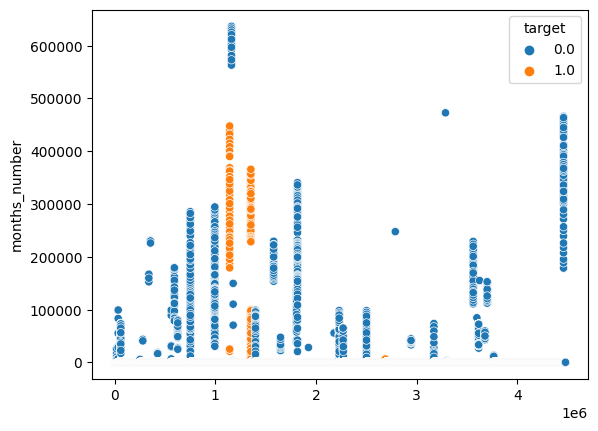

In [26]:
sns.scatterplot(x=df_train.index, y=df_train.months_number, hue=df_train.target)

(0.0, 200.0)

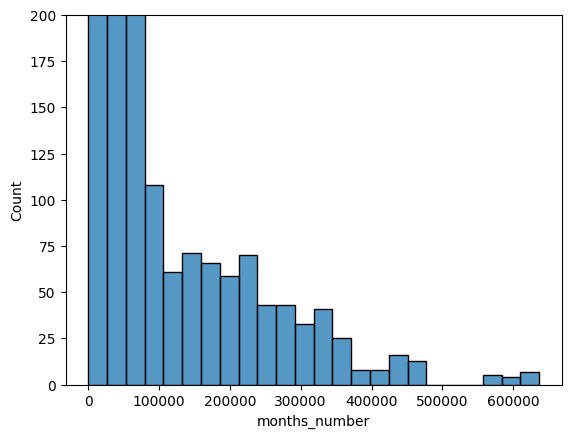

In [31]:
sns.histplot(df_train.months_number)
plt.ylim(0, 200)

In [ ]:
# we set the invoice date to datetime format
df_train.invoice_date = pd.to_datetime(df_train.invoice_date, format='%Y-%m-%d')

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               int64         
 1   client_id             object        
 2   client_catg           int64         
 3   region                int64         
 4   creation_date         object        
 5   target                float64       
 6   invoice_date          datetime64[ns]
 7   tarif_type            int64         
 8   counter_number        int64         
 9   counter_statue        object        
 10  counter_code          int64         
 11  reading_remarque      int64         
 12  counter_coefficient   int64         
 13  consommation_level_1  int64         
 14  consommation_level_2  int64         
 15  consommation_level_3  int64         
 16  consommation_level_4  int64         
 17  old_index             int64         
 18  new_index             int64         
 19  

In [ ]:
df['colname'].shift(1) 
